In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
from tensorflow.keras.utils import to_categorical

In [2]:
#data path
DATADIR = "C:/Users/marcj/Desktop/SchoolFiles/4th1st/Datasets/training" #train dataset folder
DATADIR2 = "C:/Users/marcj/Desktop/SchoolFiles/4th1st/Datasets/test" #test dataset folder

#classes
CATEGORIES = ["LicensePlateN","LicensePlateO"] #total of 36 classes [0-9][A-Z]
# CATEGORIES = ["LicensePlateN"] #total of 36 classes [0-9][A-Z]
IMG_SIZE = 100

In [3]:
#for accessing each folder

#training data
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to categories
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #convert images to greyscale                
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #resizing images to 50x50
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

#testing data
testing_data = []
def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR2, category) #path to categories
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
create_testing_data()

In [4]:
#labels
train_x = []
train_y = []

test_x = []
test_y = []

In [5]:
for features, label in training_data: 
    train_x.append(features)
    train_y.append(label)

# #convert image into 28x28x1 before feeding to network
# train_x = np.array(train_x).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #1 is grayscale
# train_y = np.array(train_y).reshape(-1)


# for features, label in testing_data:
#     test_x.append(features)
#     test_y.append(label)
# test_x = np.array(test_x).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #1 is grayscale
# test_y = np.array(test_y).reshape(-1)

#convert image into 28x28x1 before feeding to network
train_x = np.array(train_x).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #1 is grayscale
train_y = np.array(train_y).reshape(-1)


for features, label in testing_data:
    test_x.append(features)
    test_y.append(label)
test_x = np.array(test_x).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #1 is grayscale
test_y = np.array(test_y).reshape(-1)


In [315]:
#pickle is used, so that we can save the data and we dont have to rerun it everytym

# pickle_out = open("train_x.pickle","wb")
# pickle.dump(train_x, pickle_out)
# pickle_out.close()

# pickle_out = open("train_y.pickle","wb")
# pickle.dump(train_y, pickle_out)
# pickle_out.close()

# #test
# pickle_out = open("test_x.pickle","wb")
# pickle.dump(test_x, pickle_out)
# pickle_out.close()

# pickle_out = open("test_y.pickle","wb")
# pickle.dump(test_y, pickle_out)
# pickle_out.close()

In [316]:
# pickle_in = open("train_x.pickle","rb")
# train_x = pickle.load(pickle_in)

# pickle_in = open("train_y.pickle","rb")
# train_y = pickle.load(pickle_in)

# #test

# pickle_in = open("test_x.pickle","rb")
# test_x = pickle.load(pickle_in)

# pickle_in = open("test_y.pickle","rb")
# test_y = pickle.load(pickle_in)

In [6]:
#for training data there are 1000+ images dimensions are 28x28x1
#for testing data there are 600+ images dimensions are 28x28x1

print('Training data shape : ', train_x.shape, train_y.shape)
print('Testing data shape : ', test_x.shape, test_y.shape)


Training data shape :  (143, 100, 100, 1) (143,)
Testing data shape :  (59, 100, 100, 1) (59,)


In [7]:
# Find the unique numbers from the train labels

classes = np.unique(train_y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0 1]


Text(0.5, 1.0, 'Ground Truth (testing): 0')

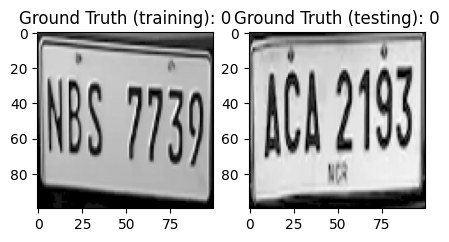

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_x[0,:,:], cmap='gray')
plt.title("Ground Truth (training): {}".format(train_y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_x[0,:,:], cmap='gray')
plt.title("Ground Truth (testing): {}".format(test_y[0]))

In [320]:
#3. DATA PREPROCESSING --------------------

In [9]:
#convert int8 -> float32 format
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

train_x = train_x / 255.
test_x = test_x / 255.

In [10]:
# Change the labels from categorical -> one-hot encoding
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

# Display the change for category label using one-hot encoding
print('Original label:', train_y[0])
print('After conversion to one-hot:', train_y_one_hot[0])



Original label: 0
After conversion to one-hot: [1. 0.]


In [11]:
#split dataset into training and validation set
#20% of the training and validation dataset are not being trained to avoid overfitting; will help boost the test performance

from sklearn.model_selection import train_test_split
train_x,valid_x,train_label,valid_label = train_test_split(train_x, train_y_one_hot, train_size=0.2, random_state=13)

In [12]:
#checking the shape of training and validation set after splitting dataset
train_x.shape, valid_x.shape, train_label.shape, valid_label.shape

#222- TRAINING
#889 - VALIDATION
# = 1111

((28, 100, 100, 1), (115, 100, 100, 1), (28, 2), (115, 2))

In [13]:
#4. THE NETWORK ------------------
# 3 convolutional layers: 32-3x3 filters;64-3 x 3 filters;128-3 x 3 filters
# architecture model: INPUT -> (1) 32-3x3 convolution filter -> max pooling 2x2 -> (2) 64-3x3 convolution filter 
# -> max pooling 2x2 -> (3) 128-3x3 convolution filter -> max pooling -> dropout -> flatten -> dense layer -> OUTPUT

In [13]:
#MODEL THE DATA

import keras
from tensorflow import keras
from keras.models import Sequential,Model
from tensorflow.python.keras.models import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

In [14]:
batch_size = 64
epochs = 50
num_classes = 2

#Batch size = number of training examples utilized in one iteration.
#no of epochs: As the number of epochs increases, 
#more number of times the weight are changed in the neural network 
#and the curve goes from underfitting to optimal to overfitting curve.


In [328]:
#5. NEURAL NETWORK ARCHITECTURE-------------------------
# CONV2D, RELU, MAXPOOLING2D, DROPOUT, FLATTEN, DENSE

In [15]:
#with dropout

plate_model = Sequential()

#first convolution layer 32-3x3 filter ------------------------
plate_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(100,100,1)))
plate_model.add(LeakyReLU(alpha=0.1))
#max pooling 2x2
plate_model.add(MaxPooling2D((2, 2),padding='same'))
#adding dropout for overfitting
plate_model.add(Dropout(0.25))

#second convolution layer 64-3x3 filter ---------------------- 
plate_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
plate_model.add(LeakyReLU(alpha=0.1))
plate_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
plate_model.add(Dropout(0.25))

#second convolution layer 128-3x3 filter ---------------------- 
plate_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
plate_model.add(LeakyReLU(alpha=0.1))                  
plate_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
plate_model.add(Dropout(0.4))
#adding flatten layer
plate_model.add(Flatten())
plate_model.add(LeakyReLU(alpha=0.1))           
plate_model.add(Dropout(0.3))
#adding dense layer
plate_model.add(Dense(2, activation='softmax'))
# class

#total of 16 added layers

In [16]:
#output layer 
plate_model.compile(loss = keras.losses.categorical_crossentropy, 
                    optimizer = keras.optimizers.Adam(), #compile the model using adam optimizer
                    metrics = ['accuracy'])

In [17]:
#VISUALIZE THE LAYERS
plate_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50, 50, 64)        0         
                                                        

In [332]:
#7.TRAIN THE MODEL ------------------------------

In [18]:
plate_train = plate_model.fit(train_x, train_label, 
                                  batch_size=batch_size,
                                  epochs=epochs,
                                  verbose=1,
                                  validation_data=(valid_x, valid_label))

#shows 50 epochs for training

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.6721 - accuracy: 0.6429 - val_loss: 0.4430 - val_accuracy: 0.8348
Epoch 2/50
1/1 [==============================] - 0s 353ms/step - loss: 0.4601 - accuracy: 0.8571 - val_loss: 0.4390 - val_accuracy: 0.8348
Epoch 3/50
1/1 [==============================] - 0s 345ms/step - loss: 0.5085 - accuracy: 0.8571 - val_loss: 0.4589 - val_accuracy: 0.8348
Epoch 4/50
1/1 [==============================] - 0s 346ms/step - loss: 0.4300 - accuracy: 0.8571 - val_loss: 0.5089 - val_accuracy: 0.8348
Epoch 5/50
1/1 [==============================] - 0s 321ms/step - loss: 0.3957 - accuracy: 0.8571 - val_loss: 0.5536 - val_accuracy: 0.8348
Epoch 6/50
1/1 [==============================] - 0s 327ms/step - loss: 0.4187 - accuracy: 0.8571 - val_loss: 0.5704 - val_accuracy: 0.8348
Epoch 7/50
1/1 [==============================] - 0s 329ms/step - loss: 0.4256 - accuracy: 0.8571 - val_loss: 0.5632 - val_accuracy: 0.8348
Epoch 8/50
1/1 [=======

In [19]:
# # save the model
# plate_model.save("car_dropout.h5") #sample

plate_model.save_weights("greycar_dropout.hdf5") #sample

In [335]:
#8. MODEL EVALUATION -------------------------

In [20]:
test_eval = plate_model.evaluate(test_x, test_y_one_hot, verbose=1)
#shows the test loss and accuracy 
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

2/2 [==============================] - 0s 40ms/step - loss: 0.0359 - accuracy: 0.9661
Test loss: 0.03591695427894592
Test accuracy: 0.9661017060279846


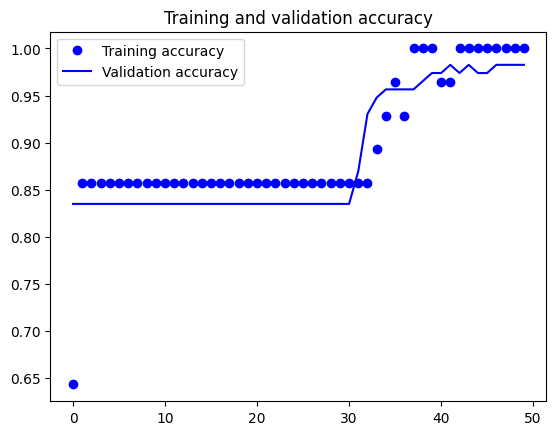

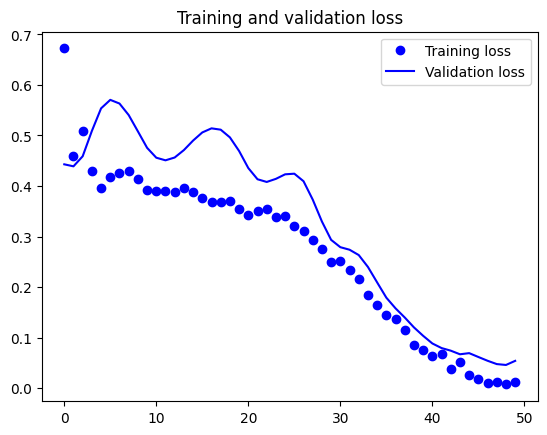

In [21]:
# plot the accuracy and loss points
#shows graph of training and validation accuracy 
#shows graph of training and validation loss

accuracy = plate_train.history['accuracy']
val_accuracy = plate_train.history['val_accuracy']
loss = plate_train.history['loss']
val_loss = plate_train.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


#result: validation loss and validation accuracy both are in sync with the training loss and training accuracy. 
# Even though the validation loss and accuracy line are not linear, 
#but it shows that your model is not overfitting: the validation loss is decreasing and 
#not increasing, and there is not much gap between training and validation accuracy.


In [338]:
#9. PREDICT MODELS -----------------

In [22]:
predicted_classes = plate_model.predict(test_x)

2/2 [==============================] - 0s 34ms/step


In [161]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [162]:
predicted_classes.shape, test_y.shape

((59,), (59,))

Found correct labels


C:\Users\marcj\AppData\Local\Temp\ipykernel_19076\2015016392.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


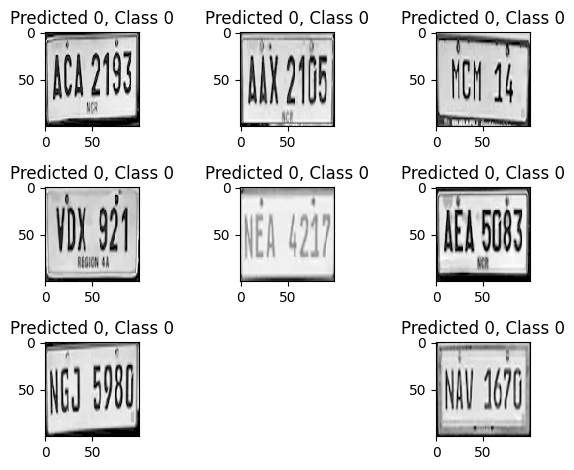

In [163]:
# FOUND CORRECT LABELS
correct = np.where(predicted_classes==test_y)[0]
print("Found correct labels")
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_x[correct].reshape(100,100), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_y[correct]))
    plt.tight_layout()

Found incorrect labels


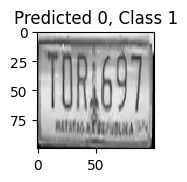

In [164]:
#FOUND INCORRECT LABELS

incorrect = np.where(predicted_classes!=test_y)[0]
print("Found incorrect labels")
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_x[incorrect].reshape(100,100), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_y[incorrect]))
    plt.tight_layout()
    
#RESULTS: make sense because training accuracy is only about 89% 

In [344]:
#10. CLASSIFICATION REPORT -----------------------
#for identifying the misclassified classes in more detail.

In [165]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99        50
     Class 1       1.00      0.89      0.94         9

    accuracy                           0.98        59
   macro avg       0.99      0.94      0.97        59
weighted avg       0.98      0.98      0.98        59

